In [20]:
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
# read the file wikirank-fr-v2.tsv
df = pd.read_csv('wikirank-fr-v2.tsv', sep='\t')


In [22]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5220886 entries, 0 to 5220885
Data columns (total 5 columns):
 #   Column            Dtype  
---  ------            -----  
 0   page_id           int64  
 1   page_name         object 
 2   quality           float64
 3   popularity        float64
 4   authors_interest  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 199.2+ MB
None


In [23]:
df.head()

,page_id,page_name,quality,popularity,authors_interest
0,4294959,Jean-Michel Ripa,14.7283,0.0,0.0
1,8433066,June Mar Fajardo,9.5865,0.0,0.0
2,6550804,Cnemaspis australis,23.0236,0.0,0.0
3,11861210,Équipe de Gambie des moins de 20 ans de football,15.3672,0.0,0.0
4,507867,Jerónimo Luis de Cabrera,9.5600,0.0,0.0


In [24]:
# count the missing values in each column
missing_values_count = df.isnull().sum()

print(missing_values_count)

page_id               0
page_name             7
quality               1
popularity          513
authors_interest      1
dtype: int64


In [25]:
# delette row with missing values
df = df.dropna()
df.info()

# count the missing values in each column
missing_values_count = df.isnull().sum()

print(missing_values_count)

<class 'pandas.core.frame.DataFrame'>
Index: 5220367 entries, 0 to 5220884
Data columns (total 5 columns):
 #   Column            Dtype  
---  ------            -----  
 0   page_id           int64  
 1   page_name         object 
 2   quality           float64
 3   popularity        float64
 4   authors_interest  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 239.0+ MB
page_id             0
page_name           0
quality             0
popularity          0
authors_interest    0
dtype: int64


In [26]:
# delette the doblones with the same id in page_id
df = df.drop_duplicates(subset='page_id', keep='first')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2037826 entries, 0 to 5220874
Data columns (total 5 columns):
 #   Column            Dtype  
---  ------            -----  
 0   page_id           int64  
 1   page_name         object 
 2   quality           float64
 3   popularity        float64
 4   authors_interest  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 93.3+ MB


In [27]:
# witch columns have the bigest size
print(df.memory_usage(deep=True))


Index                16302608
page_id              16302608
page_name           169620287
quality              16302608
popularity           16302608
authors_interest     16302608
dtype: int64


In [28]:
# check the data type of each column
data_types = df.dtypes

print(data_types)

page_id               int64
page_name            object
quality             float64
popularity          float64
authors_interest    float64
dtype: object


In [29]:
# count the number of duplicate values for each column
duplicate_rows = df.duplicated().sum()
print(duplicate_rows)

0


In [30]:
# compte les intervalles de valeurs pour chaque colonne
df.describe()
for col in df.columns:
    if df[col].dtype == 'int64':
        print(col,df[col].min(), df[col].max())
    if df[col].dtype == 'float64':
        print(col,df[col].min(), df[col].max())




page_id 3 12530836
quality 0.0105 1000.0
popularity 0.0 17317.0
authors_interest 0.0 317.0


<Axes: ylabel='Frequency'>

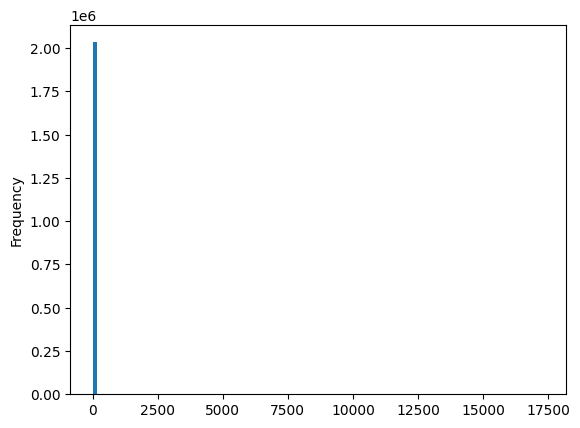

In [31]:
# plot popularity
df['popularity'].plot.hist(bins=100)

In [32]:
# print the top 20 best and bad ranking
print(df.sort_values(by='popularity', ascending=False).head(20))
print(df.sort_values(by='popularity', ascending=False).tail(20))


          page_id                                page_name   quality  \
2021990      1095                                   France  100.0000   
2023223   5285512                             Comptabilité   18.8296   
2592378   3892024                          Game of Thrones   96.3727   
1278341   3216891                                  Accueil    2.5082   
523420   11315187              Saison 8 de Game of Thrones   43.9725   
421561      19424           Cathédrale Notre-Dame de Paris   88.8588   
273006   12460202                      Décès en avril 2019   10.7069   
1907900     68652                          Erreur HTTP 404   33.5697   
1343693   7361016                     Alfred Werner Maurer   18.8237   
3351465  11321803                       Angèle (chanteuse)   39.8624   
561601   10698127                                  Vault 7   38.3373   
562089   11331377  Élections européennes de 2019 en France   71.5792   
908219       1249                                   Google   95.

In [33]:
# count the number of articles with a popularity of 0
num_articles_popularity_0 = df[df['popularity'] == 0].shape[0]

print(num_articles_popularity_0)

1224742


                   page_id   quality  popularity  authors_interest
page_id           1.000000 -0.005846   -0.107942         -0.030254
quality          -0.005846  1.000000    0.204323          0.212713
popularity       -0.107942  0.204323    1.000000          0.355606
authors_interest -0.030254  0.212713    0.355606          1.000000


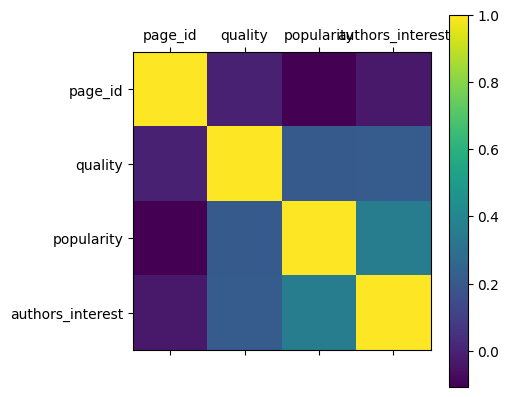

In [34]:

# display the correlation between all variables
# exclude object in df
df_corr = df.select_dtypes(exclude=['object'])
correlation_matrix = df_corr.corr()

print(correlation_matrix)

# plot the values of the correlation matrix print values and legend
plt.matshow(correlation_matrix)
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.colorbar()
plt.show()


